# MA4
* Christopher Young

# [CptS 215 Data Analytics Systems and Algorithms](https://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
## MA4 Queue Analysis (50 pts)
<mark>Due:</mark>

### Learner Objectives
At the conclusion of this micro assignment, participants should be able to:
* Analyze stack and queue data structures for efficiency
* Implement a queue using two stacks
* Compare/contrast different implementations of a queue ADT

### Prerequisites
Before starting this micro assignment, participants should be able to:
* Write object oriented Python code
* Write Markdown and code cells in Jupyter Notebook
* Understand the stack ADT and implement a stack
* Understand the queue ADT and implement a queue

### Acknowledgments
Content used in this assignment is based upon information in the following sources:
* Carl Kingsford's [Basic Data Structures](https://www.engage-csedu.org/find-resources/problem-set-1-basic-data-structures) problem set.

## Overview and Requirements
For this micro assignment, you are going to download this Jupyter Notebook and answer the following questions. Your answer for a problem should be in a cell *immediately* after the problem cell. *Do not modify the problem cell.*

We are going to explore the efficiency of two different queue implementations. This micro assignment includes conceptional questions and programming.

### Conceptual Questions
Suppose you are given a (strange) computer that can only perform the following instructions (in addition to if and while):
* `S = create_stack()` create stack makes a new stack `S`
* `i = S.pop()` removes the top item from stack `S` and places it in variable `i`
* `S.push(i)` makes item `i` the top item in stack `S`

Solve the following problems and *justify* your answers:
1. (10 pts) Show how you can use these operations to implement a queue (operations `Q = create_queue()`, `enqueue(i)`, `i = dequeue()`)
    * A picture might help to explain your answer
    * Hint: take a look at the following image:
<img src="http://www.algoqueue.com/algoqueue/members/get_uploaded_image.load/149" width="500">
(image from [http://www.algoqueue.com/algoqueue/members/get_uploaded_image.load/149](http://www.algoqueue.com/algoqueue/members/get_uploaded_image.load/149))
1. (5 pts) What's the worst case running time of your dequeue implementation?
1. (5 pts) Over a series of `n` enqueues followed by `n` dequeues, how many `pop()` operations does your implementation perform?

### Implementation Questions
Write a program that implements a queue using a standard list implementation (see [M&R 3.12](http://interactivepython.org/runestone/static/pythonds/BasicDS/ImplementingaQueueinPython.html)) and a queue using your solution to conceptual question #1. For the latter, you must implement a stack using a standard list implementation (see [M&R 3.5](http://interactivepython.org/runestone/static/pythonds/BasicDS/ImplementingaStackinPython.html)).

Generate a sequence of `enqueue`s and `dequeue`s to test your two queue implementations. To generate the test sequence, randomly `enqueue` and `dequeue` strings from [words.txt](https://raw.githubusercontent.com/gsprint23/cpts215/master/microassignments/files/words.txt), a file containing all 118,309 valid crossword puzzle words, one on each line. Evaluate the differences between the two implementations by performing the following:
1. Using [`timeit()`](https://docs.python.org/3/library/timeit.html), compare the running time for each queue implementation operating on your test sequence. Vary the size of your test sequence.
    * Note: Make sure you are using the same test sequence for each implementation! Also, remove all frivolous code from your implementations (e.g. `print()` statements), as these can affect the timing!
1. Write code to test your answer to conceptual question #2. Write up your observations.
1. Write code to test your answer to conceptual question #3. Write up your observations.

## Conceptual Answers:
1. Using the commands this computer gives, I would use create two stacks but keep the second one empty. Calling enqueue would push on to stack 1 always. to call pop would first call pop from stack 1 onto push into stack 2 while stack1 has elements, essentially reversing the order of the stack. Then after stack1 runs out of elmelents, the function would call pop on stack 2 out to the user. After popping the element, in order to further enqueue it would finish by popping all the elements from stack2 and pushing them back onto stack while stack 2 has elements.

2. My implimentation would need a $ T(2n+1) $ worstcase time complexity for each single operation, with a linear $ O(n^2) $ growth rate for n operations.

3. My implementations would only need to do $ 2n+1 $ pops. n to pop from 1 onto 2, 1 to pop off element, n pops from stack 2 onto 1.

## Implementation Answers:

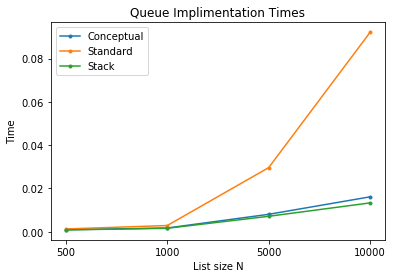

In [197]:
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
class Queuestd:
    def __init__(self):
        self.items = []
    def isempty(self):
        return self.items == []
    def enqueue(self, element):
        self.items.insert(0,element)
    def dequeue(self):
        return self.items.pop()
    def self(self):
        return len(self.items)
    
class Queuecon:
    def __init__(self):
        self.stack1 = []
        self.stack2 = []
    def isempty1(self):
        return self.stack1 == []
    def isempty2(self):
        return self.stack2 == []
    def enqueue(self, element):
        self.stack1.append(element)
    def dequeue(self):
        while not self.isempty1():
            temp = self.stack1.pop()
            self.stack2.append(temp)
        popped = self.stack2.pop()
        while not self.isempty2():
            temp = self.stack2.pop()
            self.stack1.append(temp)
        return popped
            
class Stackstd:
    def __init__(self):
        self.stack = []
    def push(self, element):
        self.stack.append(element)
    def pop(self):
        return self.stack.pop()
    def isempty(self):
        return self.stack == []
    
def makeplot(sers, title):
    x_locs = np.arange(1, 5)
    x_labels = [500, 1000, 5000, 10000]
    f, ax = plt.subplots()
    ax.set_title(title)
    ax.set_ylabel("Time")
    ax.set_xlabel("List size N")
    ax.set_xticks(x_locs)
    ax.set_xticklabels(x_labels)
    for ser in sers:
        plt.plot(x_locs,  ser,marker = '.', label=ser.name)
    plt.legend(loc=0)
    plt.savefig("%s.png" %(title))
    plt.show()
qusetup = '''
from __main__ import Queuecon
from __main__ import Queuestd
from __main__ import Stackstd
import numpy as np
infile = open("words.txt", "r")
qucon = Queuecon()
qustd = Queuestd()
stack = Stackstd()
'''
quconstmt500 = '''
for i in range(0,500):
    qucon.enqueue(infile.readline())
while not qucon.isempty1:
    qucon.dequeue()

'''
quconstmt1000 = '''
for i in range(0,1000):
    qucon.enqueue(infile.readline())
while not qucon.isempty1:
    qucon.dequeue()

'''
quconstmt5000 = '''
for i in range(0,5000):
    qucon.enqueue(infile.readline())
while not qucon.isempty1:
    qucon.dequeue()

'''
quconstmt10000 = '''
for i in range(0,10000):
    qucon.enqueue(infile.readline())
while not qucon.isempty1:
    qucon.dequeue()

'''
qustdstmt500 = '''
for i in range(0,500):
    qustd.enqueue(infile.readline())
while not qucon.isempty1:
    qustd.dequeue()

'''
qustdstmt1000 = '''
for i in range(0,1000):
    qustd.enqueue(infile.readline())
while not qucon.isempty1:
    qustd.dequeue()

'''
qustdstmt5000 = '''
for i in range(0,5000):
    qustd.enqueue(infile.readline())
while not qucon.isempty1:
    qustd.dequeue()

'''
qustdstmt10000 = '''
for i in range(0,10000):
    qustd.enqueue(infile.readline())
while not qucon.isempty1:
    qustd.dequeue()

'''
stackstmt500 = '''
for i in range(0,500):
    stack.push(infile.readline())
while not qucon.isempty1:
    stack.pop()

'''
stackstmt1000 = '''
for i in range(0,1000):
    stack.push(infile.readline())
while not qucon.isempty1:
    stack.pop()

'''
stackstmt5000 = '''
for i in range(0,5000):
    stack.push(infile.readline())
while not qucon.isempty1:
    stack.pop()

'''
stackstmt10000 = '''
for i in range(0,10000):
    stack.push(infile.readline())
while not qucon.isempty1:
    stack.pop()

'''

    
qucondata = [timeit.timeit(setup = qusetup, stmt = quconstmt500, number = 1),
                           timeit.timeit(setup = qusetup, stmt = quconstmt1000, number = 1),
                           timeit.timeit(setup = qusetup, stmt = quconstmt5000, number = 1),
                           timeit.timeit(setup = qusetup, stmt = quconstmt10000, number = 1)]
conceptualdata = pd.Series(qucondata, index = [500,1000,5000,10000], name = "Conceptual")
qustddata = [timeit.timeit(setup = qusetup, stmt = qustdstmt500, number = 1),
                           timeit.timeit(setup = qusetup, stmt = qustdstmt1000, number = 1),
                           timeit.timeit(setup = qusetup, stmt = qustdstmt5000, number = 1),
                           timeit.timeit(setup = qusetup, stmt = qustdstmt10000, number = 1)]
standarddata = pd.Series(qustddata, index = [500,1000,5000,10000], name = "Standard")
stkdata = [timeit.timeit(setup = qusetup, stmt = stackstmt500, number = 1),
                           timeit.timeit(setup = qusetup, stmt = stackstmt1000, number = 1),
                           timeit.timeit(setup = qusetup, stmt = stackstmt5000, number = 1),
                           timeit.timeit(setup = qusetup, stmt = stackstmt10000, number = 1)]
stackdata = pd.Series(stkdata, index = [500,1000,5000,10000], name = "Stack")
timespd = [conceptualdata, standarddata, stackdata]
makeplot(timespd, "Queue Implimentation Times")

### 1)
* From my timeit result graph it is clear to see that the standard implementstion of a queue took much longer than my conceptual answer or than the standard stack implimentation. This could be because of the added time that the insert function takes finding its index and inserting there compared to the quick and efficient append and pop that my conceptual queue uses. This emphasises the usefullness of basic commands verusus language implimented functions that might have more underlying commands than can be used to solve the same problem. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


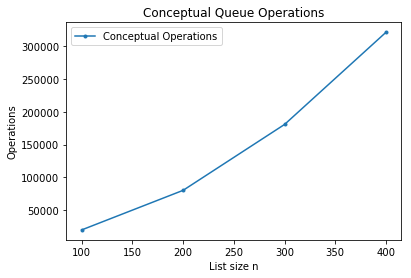

Pop Operations per n of (1000): 1001000
Pop Operations per n of (500): 250500
Pop Operations per n of (250): 62750
Pop Operations per n of (100): 10100


In [3]:
import matplotlib.pyplot as plt
class Queuecondata:
    def __init__(self):
        self.stack1 = []
        self.stack2 = []
        self.pushpop = [0,0]
    def isempty1(self):
        return self.stack1 == []
    def isempty2(self):
        return self.stack2 == []
    def enqueue(self, element):
        self.pushpop[0] += 1
        self.stack1.append(element)
    def dequeue(self):
        while not self.isempty1():
            self.pushpop[1] += 1
            temp = self.stack1.pop()
            self.pushpop[0] += 1
            self.stack2.append(temp)
        self.pushpop[1] += 1
        popped = self.stack2.pop()
        while not self.isempty2():
            self.pushpop[1] += 1
            temp = self.stack2.pop()
            self.pushpop[0] += 1
            self.stack1.append(temp)
        return popped
    def getdata(self):
        return self.pushpop

def makeplot(sers, title):
    plt.xlabel("List size n")
    plt.ylabel("Operations")
    plt.title(title)
    plt.legend(loc=2)
    x = [100,200,300,400]
    plt.plot(x, sers,marker = '.', label = "Conceptual Operations")
    plt.legend(loc=2)
    plt.savefig("%s.png" %(title))
    plt.show()
    
def quedata(n):
    temp = Queuecondata()
    for i in range(0,n):
        temp.enqueue(i)
    for i in range(0,n):
        temp.dequeue()
    return temp.getdata()

conceptualopdata = [quedata(100)[0] + quedata(100)[1], quedata(200)[0] + quedata(200)[1],
                   quedata(300)[0] + quedata(300)[1],quedata(400)[0] + quedata(400)[1]]
makeplot(conceptualopdata, "Conceptual Queue Operations")
x = 1000
popoperations = quedata(x)[1]
print("Pop Operations per n of (%s): %s" %(x, popoperations))
x = 500
popoperations = quedata(x)[1]
print("Pop Operations per n of (%s): %s" %(x, popoperations))
x = 250
popoperations = quedata(x)[1]
print("Pop Operations per n of (%s): %s" %(x, popoperations))
x = 100
popoperations = quedata(x)[1]
print("Pop Operations per n of (%s): %s" %(x, popoperations))

#### 2)
* My implemintation of a queue using the limited commands of the proposed computer took $2n^2+n$ operations to push and pop n data values. This was due to having to perform $2*n + 1$ pops and $2*$ push for every dequque plus $1$ push for every enqueue.Performing these operations $n$ times gives $2n+1$ operations happening $n$ times, resulting in $2n^2+n$ operations for $n$ queues followed by $n$ dequeues. This results in a time complexity of $O(2n^2+n)$ or $O(n^2)$

#### 3)
* My implemintation of a queue using the limited commands of the proposed computer takes $2n+1$ pop operations for every dequeue because of needing to pop every element off of stack 1 before it pops 1 off of stack 2. These 2 stack operations n times results in $2n^2+n$ pop operations. 
* From doing a series of dequeue 

## Bonus (5 pts)
Perform additional analysis and comparisons of your two queue implementations above to the following:
1. Linked lists implementations of the stacks and queue (you must write the implementation yourself)
1. Python's `deque` container from `collections`

Include `timeit()` results and a write up of your observations.

## Submitting Assignments
1.	Use the Blackboard tool https://learn.wsu.edu to submit your assignment. You will submit your code to the corresponding programming assignment under the "Content" tab. You must upload your solutions as `<your last name>_ma4.zip` by the due date and time.
2.	Your .zip file should contain your .ipynb file and a .html file representing your Notebook as a webpage (File->Download as->HTML). Also include [words.txt](https://raw.githubusercontent.com/gsprint23/cpts215/master/microassignments/files/words.txt) in your .zip file.

## Grading Guidelines
This assignment is worth 50 points + 5 points bonus. Your assignment will be evaluated based on a successful compilation and adherence to the program requirements. We will grade according to the following criteria:
* 20 pts for answering the conception questions
* 5 pts for correct implementation of the list-based queue
* 10 pts for correct implementation of the stack-based queue
* 5 pts for `timeit()` results
* 5 pts for observation write ups
* 5 pts for for adherence to proper programming style and comments established for the class